In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sc.constants as cs
from sc import payoff as po
from yq.scripts import simulation as yqsm

print(pd.__version__)

In [ ]:
paths_arr = yqsm.read_sim_data('heston', '20231114_025704_252_0.5', pd.Timestamp('2023-08-14'), pd.Timestamp('2023-08-15'))
print(paths_arr)

In [ ]:
#prep for multipath

df_sim_array_14 = []
for df in paths_arr[0]:
    df_sim_array_14.append(df.rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'}))

df_sim_array_15 = []
for df in paths_arr[1]:
    df_sim_array_15.append(df.rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'}))

In [ ]:
# from pathlib import Path
# from yq.utils import path as yq_path
# import os
# paths_arr = yqsm.read_sim_data('gbm', '20231111_195045_022812', pd.Timestamp('2023-08-09'), pd.Timestamp('2023-08-15'))
# df_sim = paths_arr[0][0]

# fig, ax = plt.subplots(figsize=(10,6))

# hist_data = po.get_historical_assets_all()
# hist_df = hist_data[(hist_data.index >= cs.INITIAL_FIXING_DATE) 
#                            & (hist_data.index <= cs.FINAL_FIXING_DATE)]
# for asset in cs.ASSET_NAMES:
#     ax.plot(hist_df.index, hist_df[asset], alpha=0.5, label=asset)
# for col in df_sim.columns:
#     ax.plot(df_sim.index, df_sim[col], alpha=0.5, label=col)


# title_str = f"PPD: "
# plt.title(title_str)
# plt.legend(loc='upper right')
# plt.tight_layout()
# stor_dir = yq_path.get_plots_path(Path(os.getcwd()).parent)                     
# stor_dir.mkdir(parents=True, exist_ok=True)
# file_path = stor_dir.joinpath(f'test.png')
# plt.savefig(file_path, bbox_inches='tight')

In [ ]:
df_plot = paths_arr[0][5].copy(deep = True)
print(po.payouts(df_plot, barrierHit = False))
for asset in cs.ASSET_NAMES:
    df_plot[asset] = df_plot[asset] / cs.INITIAL_LEVELS[asset]
plt.figure(figsize = (15, 8))
plt.plot(df_plot)
plt.axhline(y=1, c = "black", alpha = 0.5)
plt.axhline(y = 0.6, c = "red", alpha = 0.5)
plt.axvline(x = cs.FINAL_FIXING_DATE, c = "darkgreen")
for date in cs.EARLY_REDEMPTION_OBSERVATION_DATES:
    plt.axvline(x = date, c = "green", alpha = 0.5)



In [ ]:
#Entire process

first_date = pd.Timestamp('2023-08-09')
last_date = pd.Timestamp('2023-11-09')

#load simulated paths from csvs
total_data = yqsm.read_sim_data('gbm', '20231114_031302_63', first_date, last_date)

est_price = []
for single_day in total_data:
    #rename columns
    df_sim_array = []
    for df in single_day:
        df_sim_array.append(df.rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'}))
    
    prices = po.pricing_multiple(df_sim_array)
    est_price.append(sum(prices) / len(prices))
print(est_price)




In [ ]:
df_product = po.get_product_price(pd.Timestamp('2023-11-09'))
df_product = df_product.loc[first_date : last_date]
df_product['Est_Price'] = est_price

plt.plot(df_product)

In [16]:
first_date = pd.Timestamp('2023-08-09')
last_date = pd.Timestamp('2023-11-09')

total_data = yqsm.read_sim_data('gbm', '20231114_031302_63', first_date, last_date)

#df_sim = total_data[0][0][0].rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})
#df_sim_arr = total_data[0][0]


In [17]:
# entire pricing window

prices = []
deltas = {'LONN.SE': [], 'SIKA.SE': []}
gammas = {'LONN.SE': [], 'SIKA.SE': []}
for single_day in total_data[0]:
    #rename columns
    df_sim_array = []
    for df in single_day:
        df_sim_array.append(df.rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'}))
    
    results = po.pricing_with_greeks_multiple(df_sim_array, 0.005)
    price_sum = 0
    greeks_sum = {'LONN.SE': [0, 0], 'SIKA.SE': [0, 0]}
    for sim in results:
        price_sum += sim[0]
        for asset in cs.ASSET_NAMES:
            greeks_sum[asset][0] += sim[1][asset][0]
            greeks_sum[asset][1] += sim[1][asset][1]
    est_price = price_sum / len(results)
    for asset in cs.ASSET_NAMES:
        deltas[asset].append(greeks_sum[asset][0] / len(results))
        gammas[asset].append(greeks_sum[asset][1] / len(results))
    prices.append(est_price)


[966.2525288242681, 969.5771831186898, 977.9141941469561, 965.1193259480018, 977.2165690261478, 983.3821908437669, 948.3055622307058, 936.4226366911275, 944.0578615968185, 960.2830166955057, 944.4212962553394, 968.4644148307503, 957.9949410637631, 970.5428750889022, 968.9039494039827, 987.4616691461961, 944.6768572059665, 965.8740466653941, 980.325090908593, 991.5985033083083, 995.118667915705, 975.1165859988961, 963.6765043858064, 997.1053831077638, 997.0781209207194, 996.8162078204837, 1020.9098689104004, 1014.5841348085606, 869.9236401698383, 850.2687978061763, 872.3175688347427, 878.5499293800759, 895.5723315794494, 879.8520632867095, 863.427707261317, 872.5673950855884, 865.2288485456789, 917.4682848572749, 867.3628793672195, 865.2397072076506, 860.0253637945789, 863.130584770281, 836.8004208252339, 909.1555993411217, 907.3219442732516, 877.8303077307011, 919.3866284205053, 891.8637015857212, 871.457905598754, 725.4089263540689, 728.8259323812691, 723.5868575214325, 745.9302776197

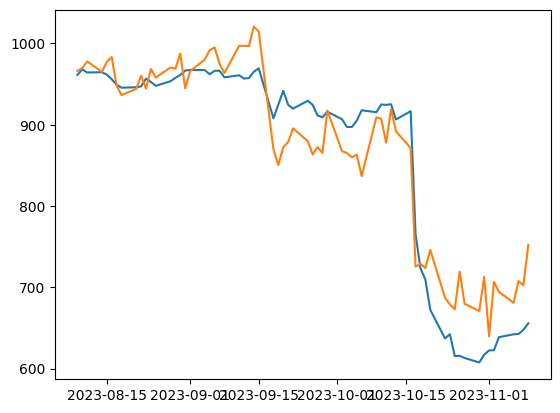

In [20]:
print(prices)
df_product = po.get_product_price(pd.Timestamp('2023-11-09'))
df_product = df_product.loc[first_date : last_date]
df_product['Est_Price'] = prices

plt.plot(df_product)

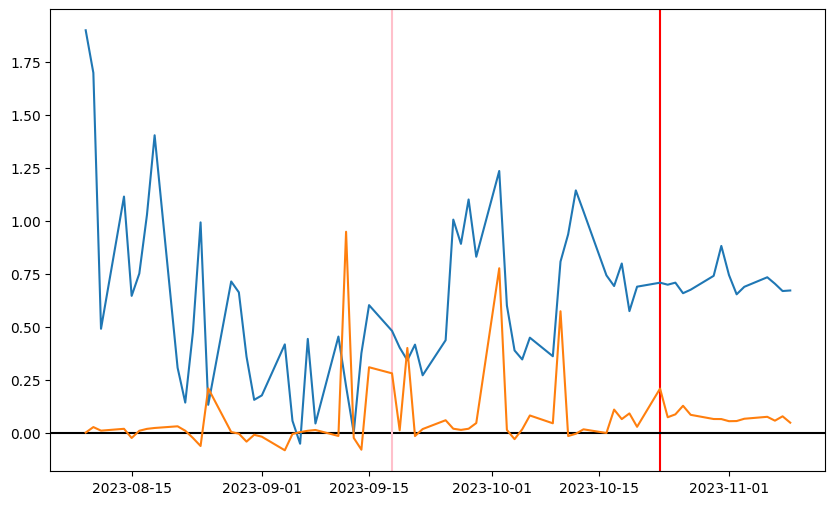

In [21]:
df_deltas = pd.DataFrame(index = df_product.index, data = deltas)

plt.figure(figsize = [10, 6])
plt.axvline(x = pd.Timestamp('2023-10-23'), color = 'red')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = pd.Timestamp('2023-09-18'), color = 'pink')
plt.plot(df_deltas)

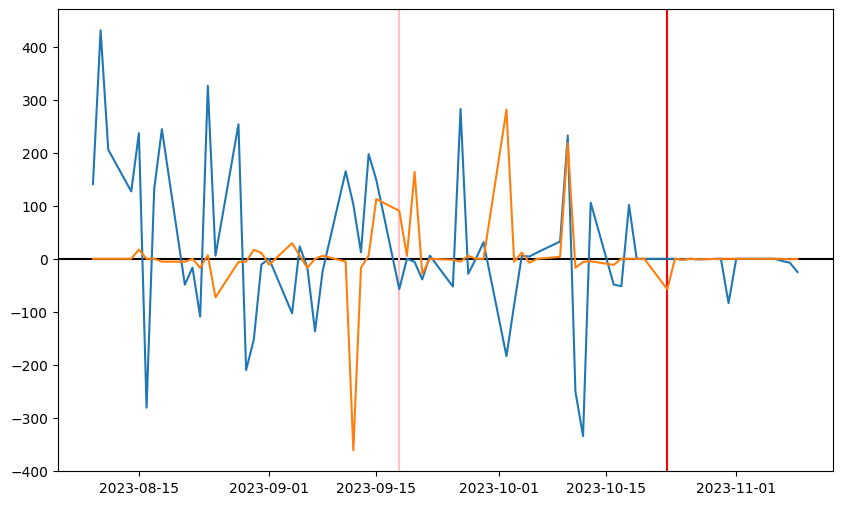

In [23]:
df_gammas = pd.DataFrame(index = df_product.index, data = gammas)

plt.figure(figsize = [10, 6])
plt.axvline(x = pd.Timestamp('2023-10-23'), color = 'red')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = pd.Timestamp('2023-09-18'), color = 'pink')
plt.plot(df_gammas)

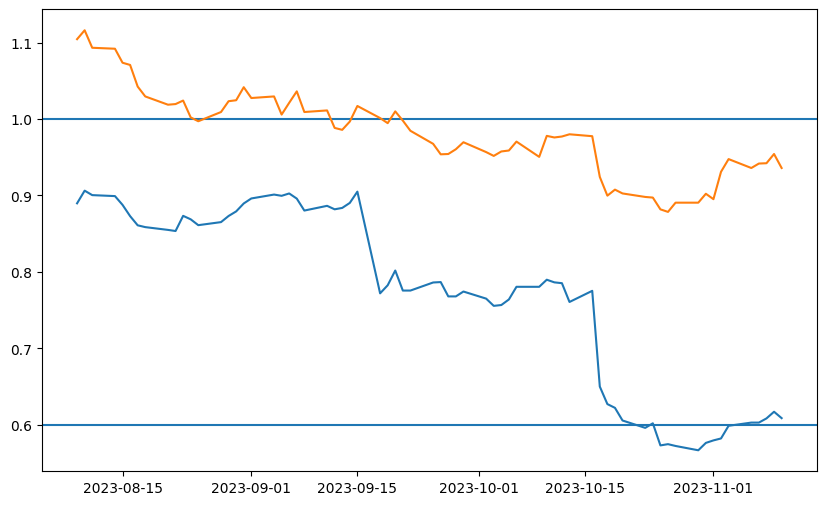

In [15]:
df_historical = po.get_historical_assets(cs.FINAL_FIXING_DATE, first_date)
today = df_historical.index[-1]
barrierHit = po.checkBarrier(df_historical)

for asset in cs.ASSET_NAMES:
    df_historical[asset] = df_historical[asset] / cs.INITIAL_LEVELS[asset]

plt.figure(figsize = [10, 6])
plt.axhline(y = 1)
plt.axhline(y = 0.6)
plt.plot(df_historical)

In [ ]:
first_date = pd.Timestamp('2023-08-09')
last_date = pd.Timestamp('2023-08-12')

total_data = yqsm.read_sim_data('gbm', '20231111_195045_022812', first_date, last_date)

df_sim = total_data[0][0][0].rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})
df_sim_arr = total_data[0][0]

df_constant = pd.DataFrame(index = df_sim.index)

In [ ]:
#print(total_data[0][0][0])

#df_sim = total_data[0][0][0].rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})
#df_sim_arr = total_data[0][0]

first_sim_date = df_sim.first_valid_index()
df_historical = po.get_historical_assets(first_sim_date, cs.INITIAL_FIXING_DATE)
today = df_historical.index[-1]
barrierHit = po.checkBarrier(df_historical)

print(barrierHit)

df_constant = pd.DataFrame(index = df_sim.index, data = {'LONN.SE': [cs.INITIAL_LEVELS['LONN.SE'] * 0.95] * len(df_sim), 'SIKA.SE': [cs.INITIAL_LEVELS['SIKA.SE'] * 0.95] * len(df_sim)})
#print(df_constant)

payouts_arr = po.payouts_h(df_constant, barrierHit, 0.01, 'LONN.SE')
print(payouts_arr)

In [ ]:
rnv_arr = po.rnv_multiple(payouts_arr, today)
print(rnv_arr)
print(po.delta(rnv_arr, 0.01))
print(po.gamma(rnv_arr, 0.01))